<a href="https://colab.research.google.com/github/davrodrod/fundamentosIA_2023_3/blob/main/RedNeuronalSencilla/classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de librerías necesarias

In [ ]:
# Fuente https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

## Carga del dataset

In [ ]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
print('Primeras 5 etiquetas (texto)')
print(y[:5])
le = LabelEncoder()
y = le.fit_transform(y)

print()
print("Primeros 5 ejemplares")
print(X[:5])
print()
print("Primeras 5 etiquetas")
print(y[:5])

Primeras 5 etiquetas (texto)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']

Primeros 5 ejemplares
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Primeras 5 etiquetas
[0 0 0 0 0]


## División de datos de entrenamiento y test

In [ ]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features


(100, 4) (50, 4) (100,) (50,)


## Construcción del modelo (Red Neuronal)

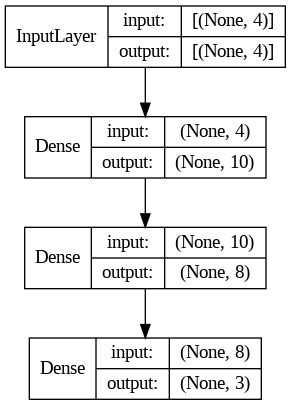

In [ ]:
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

plot_model(model, to_file='autoencoder.png', show_shapes=True, show_layer_names=False)

## Entrenamiento

Epoch 1/150
4/4 [==============================] - 2s 85ms/step - loss: 5.6252 - accuracy: 0.3300 - val_loss: 5.3379 - val_accuracy: 0.3400
Epoch 2/150
4/4 [==============================] - 0s 24ms/step - loss: 5.1958 - accuracy: 0.3300 - val_loss: 4.9097 - val_accuracy: 0.3400
Epoch 3/150
4/4 [==============================] - 0s 21ms/step - loss: 4.7748 - accuracy: 0.3300 - val_loss: 4.4917 - val_accuracy: 0.3400
Epoch 4/150
4/4 [==============================] - 0s 20ms/step - loss: 4.3748 - accuracy: 0.3300 - val_loss: 4.0814 - val_accuracy: 0.3400
Epoch 5/150
4/4 [==============================] - 0s 21ms/step - loss: 3.9810 - accuracy: 0.3300 - val_loss: 3.6886 - val_accuracy: 0.3400
Epoch 6/150
4/4 [==============================] - 0s 22ms/step - loss: 3.6065 - accuracy: 0.3300 - val_loss: 3.3281 - val_accuracy: 0.3400
Epoch 7/150
4/4 [==============================] - 0s 25ms/step - loss: 3.2724 - accuracy: 0.3300 - val_loss: 3.0157 - val_accuracy: 0.3400
Epoch 8/150
4/4 [===

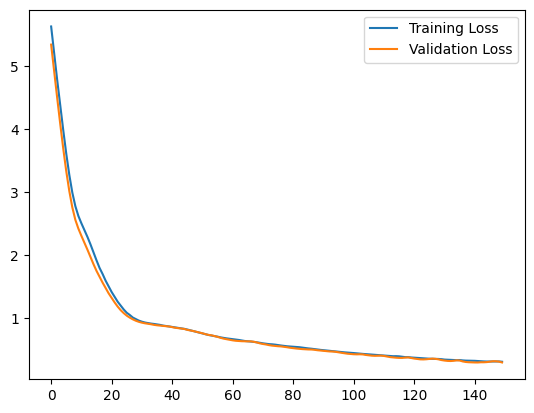

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# evaluate the model
#loss, acc = model.evaluate(X_test, y_test, verbose=0)
#print('Test Accuracy: %.3f' % acc)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

## Inferencia

In [ ]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print(argmax(yhat))
print('Predicted: %s (class=%d-%s)' % (yhat, argmax(yhat), le.inverse_transform([argmax(yhat)])[0]))

1/1 [==============================] - 0s 71ms/step
0
Predicted: [[8.7996578e-01 1.1993080e-01 1.0339834e-04]] (class=0-Iris-setosa)
